# Guide to Abstractive Text Summarization using Deep Learning

## Introduction
“I don’t want to read your full report, just give me a summary of the results”. I have often found myself in this situation – both in University as well as in our professional life, We prepare a comprehensive report and the teacher/supervisor only has time to read the summary.

We all think so? Well, I decided to do something about it. Manually converting the report to a summarized version is too time taking, right? Can Natural Language Processing (NLP) techniques help us in achieving this?

This is where the awesome concept of Text Summarization using Deep Learning really helped me out. It solves the one issue which kept bothering me before – now our model can understand the context of the entire text. It’s a dream come true for all of us who need to come up with a quick summary of a document!
And the results we achieve using text summarization in deep learning? Remarkable. So in this article, we will walk through a step-by-step process for building a Text Summarizer using Deep Learning by covering all the concepts required to build it. And then we will implement our first text summarization model in Python!

## Table of Contents
What is Text Summarization in NLP?
<ol>
    <li>Introduction to Sequence-to-Sequence (Seq2Seq) Modeling</li>
<li>Understanding the Encoder – Decoder Architecture</li>
<li>Limitations of the Encoder – Decoder Architecture</li>
<li>The Intuition behind the Attention Mechanism</li>
<li>Understanding the Problem Statement</li>
<li>Implementing a Text Summarization Model in Python using Keras</li>
</ol>

## What’s Next?
How does the Attention Mechanism Work?
I’ve kept the ‘how does the attention mechanism work?’ section at the bottom of this article. It’s a math-heavy section and is not mandatory to understand how the Python code works. However, I encourage you to go through it because it will give you a solid idea of this awesome NLP concept.

## What is Text Summarization in NLP?
Let’s first understand what text summarization is before we look at how it works. Here is a succinct definition to get us started:

“Automatic text summarization is the task of producing a concise and fluent summary while preserving key information content and overall meaning”

There are broadly two different approaches that are used for text summarization:

<li>Extractive Summarization</li>
<li>Abstractive Summarization</li>

### Extractive Summarization
The name gives away what this approach does. We identify the important sentences or phrases from the original text and extract only those from the text. Those extracted sentences would be our summary. The below diagram illustrates extractive summarization:

![Extractive Summary](extractive1.jpg)





### Abstractive Summarization
This is a very interesting approach. Here, we generate new sentences from the original text. This is in contrast to the extractive approach we saw earlier where we used only the sentences that were present. The sentences generated through abstractive summarization might not be present in the original text:

![title](abstractive1.jpg)


we are going to build an Abstractive Text Summarizer using Deep Learning in this article! Let’s first understand the concepts necessary for building a Text Summarizer model before diving into the implementation part.

Exciting times ahead!

## Introduction to Sequence-to-Sequence (Seq2Seq) Modeling
We can build a Seq2Seq model on any problem which involves sequential information. This includes Sentiment classification, Neural Machine Translation, and Named Entity Recognition – some very common applications of sequential information.

In the case of Neural Machine Translation, the input is a text in one language and the output is also a text in another language:(English to German)

#### <center> How are you? ---->  Wie geht es dir? </center>

In the Named Entity Recognition, the input is a sequence of words and the output is a sequence of tags for every word in the input sequence:


#### <center>Hafiz  Zohaib founded CommInn.  --->   B-Per, I-Per,O,B-Company,O</center>

Our objective is to build a text summarizer where the input is a long sequence of words (in a text body), and the output is a short summary (which is a sequence as well). So, we can model this as a Many-to-Many Seq2Seq problem. Below is a typical Seq2Seq model architecture:

![title](final.jpg)

There are two major components of a Seq2Seq model:

<li>Encoder</li>
<li>Decoder</li>
Let’s understand these two in detail. These are essential to understand how text summarization works underneath the code. You can also check out this tutorial to understand sequence-to-sequence modeling in more detail.

 

## Understanding the Encoder-Decoder Architecture
The Encoder-Decoder architecture is mainly used to solve the sequence-to-sequence (Seq2Seq) problems where the input and output sequences are of different lengths. Let’s understand this from the perspective of text summarization. The input is a long sequence of words and the output will be a short version of the input sequence.

![title](first.jpg)


Generally, variants of Recurrent Neural Networks (RNNs), i.e. Gated Recurrent Neural Network (GRU) or Long Short Term Memory (LSTM), are preferred as the encoder and decoder components. This is because they are capable of capturing long term dependencies by overcoming the problem of vanishing gradient.

We can set up the Encoder-Decoder in 2 phases:

<li>Training phase</li>
<li>Inference phase</li>
Let’s understand these concepts through the lens of an LSTM model.

 

## Training phase
In the training phase, we will first set up the encoder and decoder. We will then train the model to predict the target sequence offset by one timestep. Let us see in detail on how to set up the encoder and decoder.

 

## Encoder

An Encoder Long Short Term Memory model (LSTM) reads the entire input sequence wherein, at each timestep, one word is fed into the encoder. It then processes the information at every timestep and captures the contextual information present in the input sequence. I’ve put together the below diagram which illustrates this process:

![title](61.jpg)


The hidden state (hi) and cell state (ci) of the last time step are used to initialize the decoder. Remember, this is because the encoder and decoder are two different sets of the LSTM architecture.

 

## Decoder

The decoder is also an LSTM network which reads the entire target sequence word-by-word and predicts the same sequence offset by one timestep. The decoder is trained to predict the next word in the sequence given the previous word.

![title](61.jpg)

<b>start</b> and <b>end</b> are the special tokens which are added to the target sequence before feeding it into the decoder. The target sequence is unknown while decoding the test sequence. So, we start predicting the target sequence by passing the first word into the decoder which would be always the <start> token. And the <end> token signals the end of the sentence.

Pretty intuitive so far.

## Inference Phase
    
After training, the model is tested on new source sequences for which the target sequence is unknown. So, we need to set up the inference architecture to decode a test sequence:
    
![title](82.jpg)   
    
## How does the inference process work?

Here are the steps to decode the test sequence:

Encode the entire input sequence and initialize the decoder with internal states of the encoder
Pass <start> token as an input to the decoder
Run the decoder for one timestep with the internal states
The output will be the probability for the next word. The word with the maximum probability will be selected
Pass the sampled word as an input to the decoder in the next timestep and update the internal states with the current time step
Repeat steps 3 – 5 until we generate <end> token or hit the maximum length of the target sequence
    Let’s take an example where the test sequence is given by  <b>[x1, x2, x3, x4]</b>. How will the inference process work for this test sequence? I want you to think about it before you look at my thoughts below.
<ol>
    <li>Encode the test sequence into internal state vectors</li>
    <li>Observe how the decoder predicts the target sequence at each timestep:</li>
</ol>                   
<b>Timestep: t=1</b>
    
![title](d1.jpg) 
    
<b>Timestep: t=2</b>
    
![title](d2.jpg)  
    
<b>Timestep: t=3</b>
    
![title](d3.jpg) 
    
## Limitations of the Encoder – Decoder Architecture
As useful as this encoder-decoder architecture is, there are certain limitations that come with it.

<li>The encoder converts the entire input sequence into a fixed length vector and then the decoder predicts the output sequence. This works only for short sequences since the decoder is looking at the entire input sequence for the prediction
    </li>
<li>Here comes the problem with long sequences. It is difficult for the encoder to memorize long sequences into a fixed length vector</li>
“A potential issue with this encoder-decoder approach is that a neural network needs to be able to compress all the necessary information of a source sentence into a fixed-length vector. This may make it difficult for the neural network to cope with long sentences. The performance of a basic encoder-decoder deteriorates rapidly as the length of an input sentence increases.”

         -Neural Machine Translation by Jointly Learning to Align and Translate

So how do we overcome this problem of long sequences? This is where the concept of attention mechanism comes into the picture. It aims to predict a word by looking at a few specific parts of the sequence only, rather than the entire sequence. It really is as awesome as it sounds!
    
## The Intuition behind the Attention Mechanism
How much attention do we need to pay to every word in the input sequence for generating a word at timestep t? That’s the key intuition behind this attention mechanism concept.

Let’s consider a simple example to understand how Attention Mechanism works:
<ul>
    <li>Source sequence: “Which sport do you like the most?</li>
    <li>Target sequence: “I love cricket”</li>
    </ul>
The first word ‘I’ in the target sequence is connected to the fourth word ‘you’ in the source sequence, right? Similarly, the second-word ‘love’ in the target sequence is associated with the fifth word ‘like’ in the source sequence.

So, instead of looking at all the words in the source sequence, we can increase the importance of specific parts of the source sequence that result in the target sequence. This is the basic idea behind the attention mechanism.

There are 2 different classes of attention mechanism depending on the way the attended context vector is derived:
<ul>
    <li>Global Attention</li>
    <li>Local Attention</li>
    </ul>
Let’s briefly touch on these classes.
    
## Global Attention
Here, the attention is placed on all the source positions. In other words, all the hidden states of the encoder are considered for deriving the attended context vector.
    
    
    
## Local Attention
Here, the attention is placed on only a few source positions. Only a few hidden states of the encoder are considered for deriving the attended context vector.
![title](gl.png)    
## Understanding the Problem Statement
Customer reviews can often be long and descriptive. Analyzing these reviews manually, as you can imagine, is really time-consuming. This is where the brilliance of Natural Language Processing can be applied to generate a summary for long reviews.
We will be working on a really cool dataset. Our objective here is to generate a summary for the Amazon Fine Food reviews using the abstraction-based approach we learned about above.
    
## Implementing Text Summarization in Python using Keras
It’s time to fire up our Jupyter notebooks! Let’s dive into the implementation details right away.

## Custom Attention Layer
Keras does not officially support attention layer. So, we can either implement our own attention layer or use a third-party implementation. We will go with the latter option for this article. You can download the attention layer from here and copy it in a different file called attention.py.

Let’s import it into our environment:

In [3]:
from attention import AttentionLayer

## Import the Libraries

In [4]:
import numpy as np  
import pandas as pd 
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Read the dataset
This dataset consists of reviews of fine foods from Amazon. The data spans a period of more than 10 years, including all ~500,000 reviews up to October 2012. These reviews include product and user information, ratings, plain text review, and summary. It also includes reviews from all other Amazon categories.

We’ll take a sample of 100,000 reviews to reduce the training time of our model. Feel free to use the entire dataset for training your model if your machine has that kind of computational power.

In [6]:
data=pd.read_csv("Reviews.csv",nrows=100000)
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

## Drop Duplicates and NA values

In [7]:
data.drop_duplicates(subset=['Text'],inplace=True)  #dropping duplicates
data.dropna(axis=0,inplace=True)   #dropping na

## Preprocessing
Performing basic preprocessing steps is very important before we get to the model building part. Using messy and uncleaned text data is a potentially disastrous move. So in this step, we will drop all the unwanted symbols, characters, etc. from the text that do not affect the objective of our problem.
Here is the dictionary that we will use for expanding the contractions:

In [8]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}


We need to define two different functions for preprocessing the reviews and generating the summary since the preprocessing steps involved in text and summary differ slightly.
## a) Text Cleaning
Let’s look at the first 10 reviews in our dataset to get an idea of the text preprocessing steps:

In [9]:
data['Text'][:10]

0    I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1             Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
2    This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ...
3    If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The fl...
4                                                               Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taff

We will perform the below preprocessing tasks for our data:
<ol>
    <li>Convert everything to lowercase</li>
<li>Remove HTML tags</li>
<li>Contraction mapping</li>
<li>Remove (‘s)</li>
<li>Remove any text inside the parenthesis ( )</li>
<li>Eliminate punctuations and special characters</li>
<li>Remove stopwords</li>
<li>Remove short words</li>
    </ol>
Let’s define the function:

In [34]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text # remove html tags
    newString = re.sub(r'\([^)]*\)', '', newString)   # remove the signs
    newString = re.sub('"','', newString)             # remove double commas
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")]) # replace contaction mappings   
    newString = re.sub(r"'s\b","",newString)   # replace 's at end of a word
    newString = re.sub("[^a-zA-Z]", " ", newString) # Only retain alphabtes, remove numbers and any special characters
    tokens = [w for w in newString.split() if not w in stop_words] #remove stop_words
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()  # removespace if exists at start or end of a word/string: ' banana ' --> 'banana'

cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t))
#print(type(cleaned_text))

<class 'list'>


In [35]:
cleaned_text[:2]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo']

## b) Summary Cleaning
And now we’ll look at the first 10 rows of the reviews to an idea of the preprocessing steps for the summary column:

In [22]:
data['Summary'][:10]

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: Summary, dtype: object

In [23]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(summary_cleaner(t))

data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary
data['cleaned_summary'].replace('', np.nan, inplace=True) # ?
data.dropna(axis=0,inplace=True)

### Remember to add the START and END special tokens at the beginning and end of the summary:

In [25]:
data['cleaned_summary'] = data['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

Now, let’s take a look at the top 5 reviews and their summary:

In [26]:
for i in range(5):
    print("Review:",data['cleaned_text'][i])
    print("Summary:",data['cleaned_summary'][i])
    print("\n")

Review: bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
Summary: _START_ good quality dog food  _END_


Review: product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
Summary: _START_ not as advertised  _END_


Review: confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch
Summary: _START_ delight says it all  _END_


Review: looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal
Summary: _START_ cough medicine  _END_


Review: great taffy great price wide assortment yummy taffy delivery quick taffy lo

### Understanding the distribution of the sequences
Here, we will analyze the length of the reviews and the summary to get an overall idea about the distribution of length of the text. This will help us fix the maximum length of the sequence:

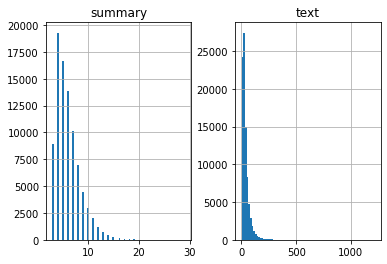

In [37]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 80)
plt.show()

Interesting. We can fix the maximum length of the reviews to 80 since that seems to be the majority review length. Similarly, we can set the maximum summary length to 10:

In [28]:
max_len_text=80 
max_len_summary=10

We are getting closer to the model building part. Before that, we need to split our dataset into a training and validation set. We’ll use 90% of the dataset as the training data and evaluate the performance on the remaining 10% (holdout set):

In [29]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(data['cleaned_text'],data['cleaned_summary'],test_size=0.1,random_state=0,shuffle=True) 

### Preparing the Tokenizer
A tokenizer builds the vocabulary and converts a word sequence to an integer sequence. Go ahead and build tokenizers for text and summary:

#### a) Text Tokenizer

In [30]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1


### b) Summary Tokenizer

In [31]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

### Model building
We are finally at the model building part. But before we do that, we need to familiarize ourselves with a few terms which are required prior to building the model.

<li>Return Sequences = True: When the return sequences parameter is set to True, LSTM produces the hidden state and cell state for every timestep</li>

<li>Return State = True: When return state = True, LSTM produces the hidden state and cell state of the last timestep only</li>

<li>Initial State: This is used to initialize the internal states of the LSTM for the first timestep</li>

<li>Stacked LSTM: Stacked LSTM has multiple layers of LSTM stacked on top of each other. This leads to a better representation of the sequence. I encourage you to experiment with the multiple layers of the LSTM stacked on top of each other (it’s a great way to learn this)</li>
Here, we are building a 3 stacked LSTM for the encoder: